# Gerar Matriz Payoff

In [9]:
import pandas as pd

# üìå Carregar os dados
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")  # Substitua pelo nome correto do arquivo

# üìå Criar a Matriz de Payoff (Taxa de Vit√≥ria Campe√£o vs. Campe√£o)
payoff_matrix = df.pivot_table(index="player_champion", 
                               columns="team2_champion1", 
                               values="binary_win", 
                               aggfunc="mean", 
                               fill_value=0)

# üìå Salvar a matriz como CSV para an√°lise posterior
payoff_matrix.to_csv("matriz_payoff_completa.csv")

# üìå Ajustar as configura√ß√µes do Pandas para exibir tudo
pd.set_option("display.max_rows", None)  # Exibir todas as linhas
pd.set_option("display.max_columns", None)  # Exibir todas as colunas
pd.set_option("display.expand_frame_repr", False)  # Evitar quebras de linha autom√°ticas

# üìå Exibir a matriz completa no console
print("üîπ Matriz de Payoff Completa:")
print(payoff_matrix)

# üìå Mostrar informa√ß√µes gerais sobre a matriz
print("\nüîπ Dimens√µes da matriz:", payoff_matrix.shape)
print("üîπ Campe√µes √∫nicos analisados:", len(payoff_matrix.index))
print("üîπ Campe√µes advers√°rios √∫nicos:", len(payoff_matrix.columns))


üîπ Matriz de Payoff Completa:
team2_champion1    Aatrox  Ahri     Akali    Akshan  Alistar   Ambessa  Amumu    Anivia     Annie  Aphelios  Ashe  AurelionSol    Aurora      Azir  Bard  Belveth  Blitzcrank  Brand  Braum     Briar   Caitlyn   Camille  Cassiopeia   Chogath     Corki    Darius  Diana   DrMundo  Draven  Ekko  Elise  Evelynn  Ezreal  FiddleSticks     Fiora      Fizz     Galio  Gangplank     Garen      Gnar    Gragas  Graves      Gwen  Hecarim  Heimerdinger      Hwei    Illaoi    Irelia  Ivern     Janna  JarvanIV       Jax     Jayce  Jhin      Jinx    KSante     Kaisa  Kalista     Karma  Karthus  Kassadin  Katarina     Kayle      Kayn    Kennen  Khazix  Kindred      Kled  KogMaw   Leblanc    LeeSin  Leona  Lillia  Lissandra  Lucian  Lulu  Lux  Malphite  Malzahar    Maokai  MasterYi  Milio  MissFortune  MonkeyKing  Mordekaiser  Morgana   Naafiri  Nami     Nasus  Nautilus     Neeko   Nidalee  Nilah  Nocturne  Nunu      Olaf   Orianna      Ornn  Pantheon     Poppy  Pyke    Qiya

# Ranking de vit√≥rias

C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\4076844846.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_winners.index, x=top_winners.values, ax=axes[0], palette="Greens_d")
C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\4076844846.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_losers.index, x=top_losers.values, ax=axes[1], palette="Reds_d")


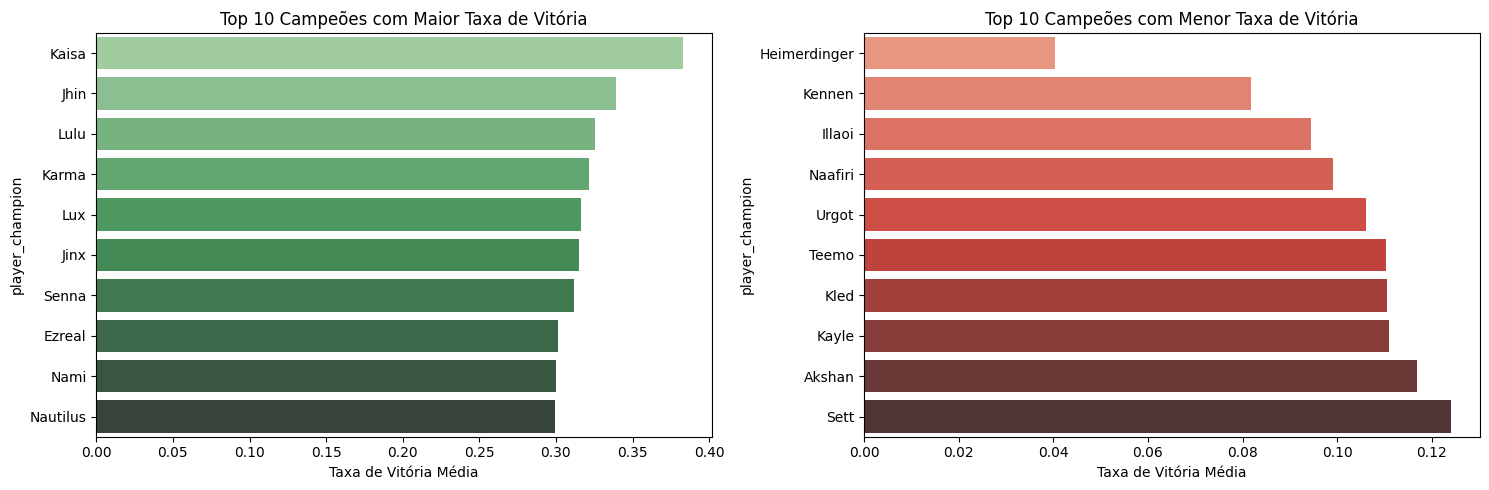

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Carregar a matriz de payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# üìå Calcular a taxa de vit√≥ria m√©dia de cada campe√£o
champion_win_rates = payoff_matrix.mean(axis=1)

# üìå Top 10 campe√µes com maior taxa de vit√≥ria
top_winners = champion_win_rates.sort_values(ascending=False).head(10)

# üìå Top 10 campe√µes com menor taxa de vit√≥ria
top_losers = champion_win_rates.sort_values(ascending=True).head(10)

# üìå Criar gr√°fico comparativo
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# üìå Gr√°fico dos campe√µes com maior taxa de vit√≥ria
sns.barplot(y=top_winners.index, x=top_winners.values, ax=axes[0], palette="Greens_d")
axes[0].set_title("Top 10 Campe√µes com Maior Taxa de Vit√≥ria")
axes[0].set_xlabel("Taxa de Vit√≥ria M√©dia")
axes[0].set_ylabel("player_champion")

# üìå Gr√°fico dos campe√µes com menor taxa de vit√≥ria
sns.barplot(y=top_losers.index, x=top_losers.values, ax=axes[1], palette="Reds_d")
axes[1].set_title("Top 10 Campe√µes com Menor Taxa de Vit√≥ria")
axes[1].set_xlabel("Taxa de Vit√≥ria M√©dia")
axes[1].set_ylabel("player_champion")

# üìå Exibir os gr√°ficos
plt.tight_layout()
plt.show()


# Melhores Counters

In [15]:
import pandas as pd

# üìå Carregar a matriz de payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# üìå Encontrar os 3 campe√µes que mais vencem contra cada campe√£o
top_counters = payoff_matrix.apply(lambda row: row.nsmallest(3).index.tolist(), axis=1)

# üìå Transformar os dados em um DataFrame
counter_data = pd.DataFrame(top_counters.tolist(), index=top_counters.index, columns=["Counter 1", "Counter 2", "Counter 3"])

# üìå Exibir os resultados
print("üîπ Melhores Counterpicks (Top 3 por Campe√£o):")
print(counter_data.head(10))


üîπ Melhores Counterpicks (Top 3 por Campe√£o):
                Counter 1 Counter 2 Counter 3
player_champion                              
Aatrox               Ahri    Akshan     Amumu
Ahri                Amumu    Anivia     Annie
Akali                Ahri    Akshan     Amumu
Akshan               Ahri     Akali   Alistar
Alistar              Ahri    Akshan     Amumu
Ambessa              Ahri     Akali    Akshan
Amumu                Ahri     Akali    Akshan
Anivia               Ahri    Akshan   Alistar
Annie                Ahri   Alistar   Ambessa
Aphelios             Ahri    Akshan   Alistar


# Distribui√ß√£o das taxas de vit√≥rias

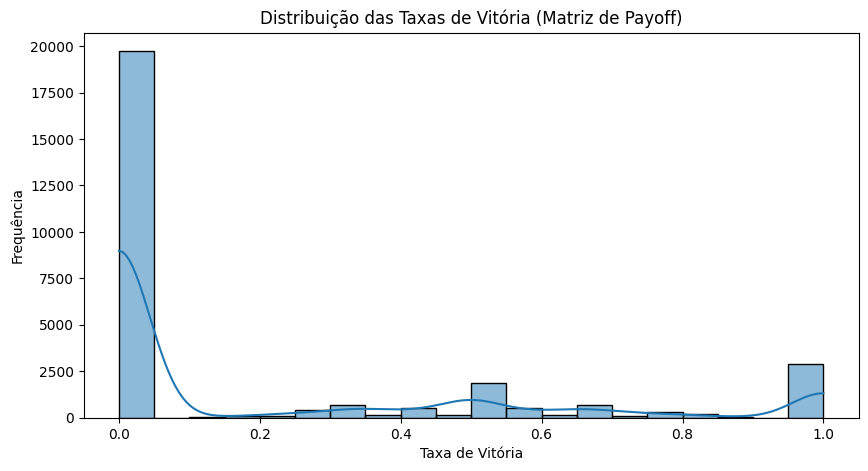

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Verificar a distribui√ß√£o das taxas de vit√≥ria
plt.figure(figsize=(10,5))
sns.histplot(payoff_matrix.values.flatten(), bins=20, kde=True)
plt.xlabel("Taxa de Vit√≥ria")
plt.ylabel("Frequ√™ncia")
plt.title("Distribui√ß√£o das Taxas de Vit√≥ria (Matriz de Payoff)")
plt.show()


# Balancear os campe√µes que aparecem menos vezes

In [ ]:
import pandas as pd

# üìå Carregar a matriz de payoff
# Carrega os dados de uma matriz em formato CSV, onde a coluna 0 √© usada como √≠ndice para identificar os campe√µes.
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# üìå Converter todas as colunas para num√©rico, for√ßando erros para NaN
# Converte os valores para num√©ricos. Valores inv√°lidos (n√£o num√©ricos) s√£o transformados em NaN.
payoff_matrix = payoff_matrix.apply(pd.to_numeric, errors="coerce")

# üìå Substituir NaN por um valor alto (para que n√£o sejam selecionados como counters)
# Substitui valores ausentes (NaN) por 1.1, presumivelmente alto o suficiente para evitar que sejam escolhidos.
payoff_matrix = payoff_matrix.fillna(1.1)

# üìå Criar um DataFrame para armazenar os counters balanceados
# Um dicion√°rio vazio ser√° usado para organizar os counters para cada campe√£o.
counter_data = {}

# üìå Definir o n√∫mero m√°ximo de vezes que um campe√£o pode aparecer como counter
# Define o limite m√°ximo de vezes que um campe√£o pode ser escolhido como counter (aqui, configurado como 3).
MAX_APPEARANCES = 3

# üìå Dicion√°rio para rastrear quantas vezes cada campe√£o j√° apareceu como counter
# Cria-se um dicion√°rio para registrar a contagem de vezes que cada campe√£o foi selecionado.
counter_appearances = {}

# üìå Iterar sobre cada campe√£o
# Itera sobre os campe√µes da matriz payoff_matrix, linha por linha.
for champion in payoff_matrix.index:
    # Ordena os advers√°rios pela menor taxa de vit√≥ria contra o campe√£o atual.
    sorted_opponents = payoff_matrix.loc[champion].sort_values()

    # Seleciona os 3 piores desempenhos (ou menos, se houver poucos advers√°rios)
    # Uma lista √© criada para armazenar os counters selecionados.
    top_counters = []
    for counter in sorted_opponents.index:
        # Verifica se o n√∫mero de vezes que o campe√£o apareceu est√° abaixo do limite m√°ximo.
        if counter_appearances.get(counter, 0) < MAX_APPEARANCES:
            # Adiciona o campe√£o √† lista de counters e incrementa sua contagem no dicion√°rio.
            top_counters.append(counter)
            counter_appearances[counter] = counter_appearances.get(counter, 0) + 1
        # Encerra o loop se j√° houver 3 counters selecionados.
        if len(top_counters) == 3:
            break

    # Salvar os counters balanceados para cada campe√£o
    # Armazena os counters encontrados em um dicion√°rio com 3 colunas principais.
    counter_data[champion] = {
        "Counter 1": top_counters[0] if len(top_counters) > 0 else None,
        "Counter 2": top_counters[1] if len(top_counters) > 1 else None,
        "Counter 3": top_counters[2] if len(top_counters) > 2 else None
    }

# üìå Criar um DataFrame final com os counters ajustados
# Transforma o dicion√°rio em um DataFrame Pandas, organizado por campe√µes e seus counters balanceados.
balanced_counters_df = pd.DataFrame.from_dict(counter_data, orient="index")

# üìå Salvar para an√°lise futura
# Exporta o DataFrame final para um arquivo CSV para an√°lise ou reutiliza√ß√£o posterior.
balanced_counters_df.to_csv("counterpicks_balanceados.csv")

# üìå Exibir os primeiros resultados
# Mostra os 10 primeiros campe√µes e seus counters balanceados no terminal para confer√™ncia.
print(balanced_counters_df.head(10))


            Counter 1    Counter 2 Counter 3
Aatrox           Zyra        Sylas   Taliyah
Ahri             Zyra       Lillia     Leona
Akali            Zyra      Nidalee     Neeko
Akshan    Mordekaiser        Poppy      Pyke
Alistar           Zoe  MissFortune     Milio
Ambessa   Mordekaiser         Ornn      Pyke
Amumu          Thresh      Naafiri   Morgana
Anivia        Naafiri      Morgana       Zoe
Annie          RekSai       Rammus     Rakan
Aphelios     Nocturne        Nilah   Nidalee


# Gerar um csv com cada counter

In [24]:
import pandas as pd

# üìå Carregar o arquivo
counterpicks_df = pd.read_csv("counterpicks_balanceados.csv")

# üìå Renomear a coluna se for necess√°rio
counterpicks_df.rename(columns={"Unnamed: 0": "player_champion"}, inplace=True)

# üìå Mesclar taxa de vit√≥ria m√©dia com os counterpicks
merged_df = counterpicks_df.melt(id_vars=["player_champion"],  # Agora est√° corrigido
                                 value_vars=["Counter 1", "Counter 2", "Counter 3"],
                                 var_name="Posi√ß√£o_Counter",
                                 value_name="Counter")

# üìå Exibir os primeiros valores para confer√™ncia
print(merged_df.head())


  player_champion Posi√ß√£o_Counter      Counter
0          Aatrox       Counter 1         Zyra
1            Ahri       Counter 1         Zyra
2           Akali       Counter 1         Zyra
3          Akshan       Counter 1  Mordekaiser
4         Alistar       Counter 1          Zoe


# Gerar a taxa de counter de cada campe√£o

In [26]:
import pandas as pd

# üìå Carregar a matriz de payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv")

# üìå Corrigir o √≠ndice se necess√°rio
if "Unnamed: 0" in payoff_matrix.columns:
    payoff_matrix = payoff_matrix.rename(columns={"Unnamed: 0": "player_champion"})
    payoff_matrix.set_index("player_champion", inplace=True)

# üìå Garantir que os dados s√£o num√©ricos (ignora colunas com texto)
payoff_matrix_numeric = payoff_matrix.select_dtypes(include=["number"])

# üìå Calcular a taxa m√©dia de vit√≥ria
win_rates = payoff_matrix_numeric.mean(axis=1).reset_index()
win_rates.columns = ["Campe√£o", "Taxa_Vitoria_Media"]

# üìå Verificar se deu certo
print(win_rates.head())

# üìå (Opcional) Salvar para uso posterior
win_rates.to_csv("taxa_media_vitoria.csv", index=False)


   Campe√£o  Taxa_Vitoria_Media
0        0            0.296267
1        1            0.277862
2        2            0.238831
3        3            0.116864
4        4            0.254828


# Calculo do counter ganhar do campe√£o

In [37]:
import pandas as pd

# üìå Carregar arquivos CSV
counterpicks_df = pd.read_csv("counterpicks_balanceados.csv", dtype=str)
win_rates = pd.read_csv("taxa_media_vitoria.csv", dtype=str)
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0, dtype=str)

# üìå Mapear √≠ndices num√©ricos para os nomes reais dos campe√µes
indice_para_campeao = {str(i): champ for i, champ in enumerate(payoff_matrix.index)}
win_rates["Campe√£o"] = win_rates["Campe√£o"].map(indice_para_campeao)

# üìå Corrigir nomes das colunas (AGORA EST√Å CORRETO)
counterpicks_df = counterpicks_df.rename(columns={"Unnamed: 0": "player_champion"})

# üìå Padronizar formata√ß√£o (remover espa√ßos, t√≠tulos)
counterpicks_df = counterpicks_df.applymap(lambda x: str(x).strip().title() if pd.notna(x) else x)

# üìå Transformar os dados para formato longo
counter_melted = counterpicks_df.melt(
    id_vars=["player_champion"],  
    value_vars=["Counter 1", "Counter 2", "Counter 3"],
    var_name="Posi√ß√£o_Counter",
    value_name="Counter"
)

# üìå Fazer o merge corretamente
merged = counter_melted.merge(win_rates, left_on="Counter", right_on="Campe√£o", how="left")

# üìå Remover linhas com taxa de vit√≥ria desconhecida (NaN)
merged = merged.dropna(subset=["Taxa_Vitoria_Media"])

# üìå Salvar resultado final
merged.to_csv("counterpicks_com_taxa_vitoria_corrigido.csv", index=False)

# Exibir algumas linhas finais
print(merged.head(10))


   player_champion Posi√ß√£o_Counter      Counter      Campe√£o   Taxa_Vitoria_Media
0           Aatrox       Counter 1         Zyra         Zyra   0.2397640965601286
1             Ahri       Counter 1         Zyra         Zyra   0.2397640965601286
2            Akali       Counter 1         Zyra         Zyra   0.2397640965601286
3           Akshan       Counter 1  Mordekaiser  Mordekaiser  0.16848200818789053
4          Alistar       Counter 1          Zoe          Zoe  0.22750214939564056
5          Ambessa       Counter 1  Mordekaiser  Mordekaiser  0.16848200818789053
6            Amumu       Counter 1       Thresh       Thresh  0.26631874059403327
7           Anivia       Counter 1      Naafiri      Naafiri  0.09911242603550297
9         Aphelios       Counter 1     Nocturne     Nocturne  0.20689438766361842
10            Ashe       Counter 1       Lucian       Lucian  0.28122446296336645


C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\2360042194.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  counterpicks_df = counterpicks_df.applymap(lambda x: str(x).strip().title() if pd.notna(x) else x)


# Melhores Counters

C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\2639610573.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Taxa_Media_Vitoria", y=counter_freq.index, data=counter_freq, palette="viridis")


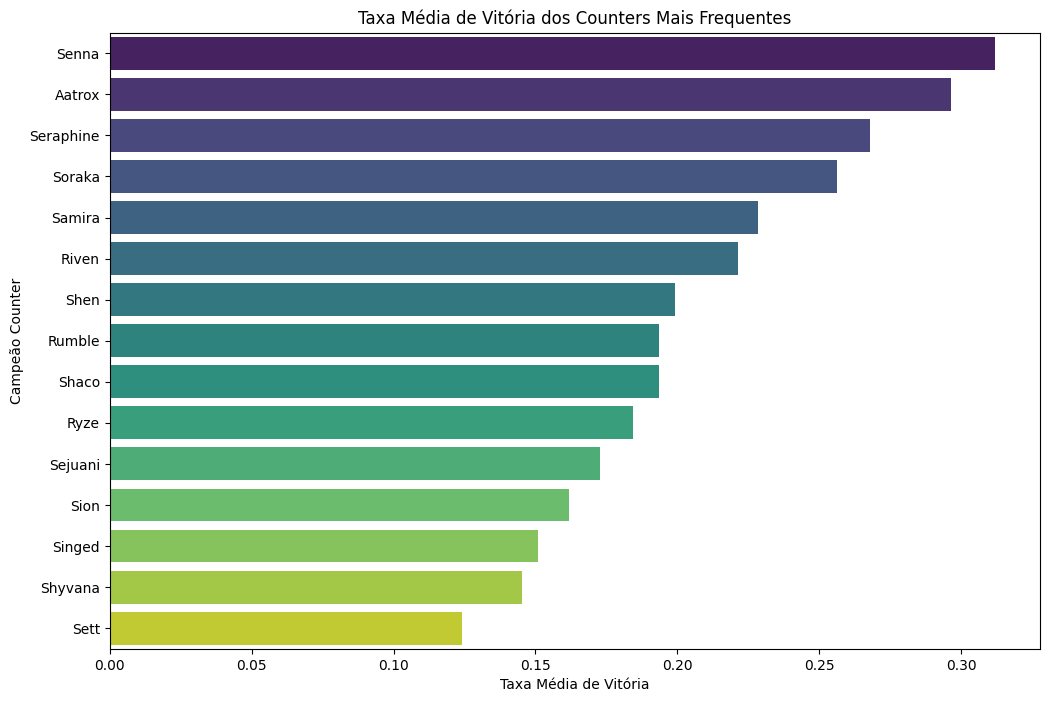

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
counters_df = pd.read_csv("counterpicks_com_taxa_vitoria_corrigido.csv")

# Agrupar os counters pela frequ√™ncia de apari√ß√µes e taxa m√©dia de vit√≥ria
counter_analysis = counters_df.groupby("Counter").agg({
    "Counter": "size",
    "Taxa_Vitoria_Media": "mean"
}).rename(columns={"Counter": "Frequencia", "Taxa_Vitoria_Media": "Taxa_Media_Vitoria"})

# Filtrar os counters mais frequentes
counter_freq = counter_analysis.sort_values(by="Frequencia", ascending=False).head(15)

# Ordenar esses counters pela taxa m√©dia de vit√≥ria
counter_freq = counter_freq.sort_values(by="Taxa_Media_Vitoria", ascending=False)

# Visualizar o resultado
plt.figure(figsize=(12, 8))
sns.barplot(x="Taxa_Media_Vitoria", y=counter_freq.index, data=counter_freq, palette="viridis")
plt.xlabel("Taxa M√©dia de Vit√≥ria")
plt.ylabel("Campe√£o Counter")
plt.title("Taxa M√©dia de Vit√≥ria dos Counters Mais Frequentes")
plt.show()


# Identifica√ß√£o de Equil√≠brios Estrat√©gicos de Nash

In [43]:
import pandas as pd
import numpy as np

# üîπ Carregar matriz payoff obtida
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# üîπ Identificar estrat√©gias dominantes
def encontrar_estrategias_dominantes(matriz):
    estrategias_dominantes = []

    # Verificando linhas (campe√µes escolhidos)
    for campeao in matriz.index:
        taxa_vitoria_camp = matriz.loc[campeao, :]
        max_outros = matriz.drop(campeao).max(axis=0)

        if (taxa_vitoria_camp >= max_outros).all():
            estrategias_dominantes.append((campeao, "Linha (escolha)"))

    # Verificando colunas (campe√µes advers√°rios)
    for adversario in matriz.columns:
        taxa_vitoria_adv = matriz.loc[:, adversario]
        min_outros = matriz.drop(adversario, axis=1).min(axis=1)

        if (taxa_vitoria_adv <= min_outros).all():
            estrategias_dominantes.append((adversario, "Coluna (advers√°rio)"))

    return estrategias_dominantes

# Encontrando estrat√©gias dominantes
dominantes = encontrar_estrategias_dominantes(payoff_matrix)

# Mostrar resultados das estrat√©gias dominantes
if dominantes:
    print("üî∏ Estrat√©gias Dominantes Encontradas:")
    for estrategia, tipo in dominantes:
        print(f"  ‚Üí {estrategia} ({tipo})")
else:
    print("üî∏ N√£o h√° estrat√©gias estritamente dominantes.")

# üîπ Encontrar equil√≠brio de Nash (simplificado - equil√≠brio puro)
def encontrar_equilibrio_nash(matriz):
    equilibrio_nash = []

    for i, campeao_escolhido in enumerate(matriz.index):
        for j, campeao_adversario in enumerate(matriz.columns):
            valor = matriz.iloc[i, j]

            # Melhor resposta para o campe√£o escolhido (linha)
            melhor_resposta_escolha = valor >= matriz.iloc[i, :].max()
            # Melhor resposta para advers√°rio (coluna)
            melhor_resposta_adv = valor <= matriz.iloc[:, j].min()

            if melhor_resposta_escolha and melhor_resposta_adv:
                equilibrio_nash.append((campeao_escolhido, campeao_adversario, valor))

    return equilibrio_nash

# Encontrar Equil√≠brios de Nash
equilibrios = encontrar_equilibrio_nash(payoff_matrix)

# Exibir Equil√≠brios de Nash encontrados
if equilibrios:
    print("\nüî∏ Equil√≠brios de Nash Encontrados:")
    for escolhido, adversario, payoff in equilibrios:
        print(f"  ‚Üí ({escolhido} vs {adversario}) com payoff {payoff:.2f}")
else:
    print("\nüî∏ Nenhum equil√≠brio de Nash encontrado em estrat√©gias puras.")



üî∏ N√£o h√° estrat√©gias estritamente dominantes.

üî∏ Nenhum equil√≠brio de Nash encontrado em estrat√©gias puras.


# Estrat√©gias Mistas

In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import linprog

# 1. Carregar matriz payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)
payoff_matrix.replace(0, np.nan, inplace=True) # Remover zeros que podem enviesar

# 2. Carregar dados hist√≥ricos originais
dados_hist = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# Frequ√™ncia real de escolha dos campe√µes advers√°rios
popularidade_adversarios = dados_hist['team2_champion1'].value_counts(normalize=True).reindex(payoff_matrix.columns).fillna(0)

# 3. Nova m√©dia ponderada com popularidade real
payoff_medio_real = payoff_matrix.mul(popularidade_adversarios, axis=1).mean(axis=1, skipna=True)

# Substituir NaN por payoff m√©dio m√≠nimo para evitar vi√©s
payoff_medio_real.fillna(payoff_medio_real.min(), inplace=True)

# 4. Otimiza√ß√£o
c = -payoff_medio_real
A_eq = [np.ones(len(payoff_medio_real))]
b_eq = [1]
bounds = [(0, 1) for _ in range(len(payoff_medio_real))]

resultado_realista = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds=bounds, method='highs')

# Resultado da nova estrat√©gia √≥tima
if resultado_realista.success:
    estrategias_otimas_realistas = pd.DataFrame({
        'Campe√£o': payoff_matrix.index,
        'Probabilidade √ìtima (%)': resultado_realista.x * 100
    }).sort_values('Probabilidade √ìtima (%)', ascending=False)

    print("üîπ Estrat√©gias √ìtimas Realistas (Probabilidades):")
    print(estrategias_otimas_realistas.head(15))
else:
    print("Problema de converg√™ncia:", resultado_realista.message)


üîπ Estrat√©gias √ìtimas Realistas (Probabilidades):
          Campe√£o  Probabilidade √ìtima (%)
44   Heimerdinger                    100.0
116     Seraphine                      0.0
108      Renekton                      0.0
109        Rengar                      0.0
110         Riven                      0.0
111        Rumble                      0.0
112          Ryze                      0.0
113        Samira                      0.0
114       Sejuani                      0.0
115         Senna                      0.0
117          Sett                      0.0
126          Sona                      0.0
118         Shaco                      0.0
119          Shen                      0.0
120       Shyvana                      0.0


In [46]:
import pandas as pd

# carregar a matriz payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# carregar dados hist√≥ricos
dados_hist = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# Encontrar advers√°rios mais populares
top_adversarios = dados_hist['team2_champion1'].value_counts().head(10).index

# Payoffs espec√≠ficos do Heimerdinger contra campe√µes advers√°rios populares
payoff_heimer = payoff_matrix.loc["Heimerdinger", top_adversarios]

print("üî∏ Payoff de Heimerdinger contra advers√°rios mais populares:")
print(payoff_heimer)


üî∏ Payoff de Heimerdinger contra advers√°rios mais populares:
team2_champion1
Aatrox         0.0
Darius         1.0
Renekton       0.0
Jax            1.0
Riven          0.0
Camille        0.0
Mordekaiser    0.0
Gnar           0.0
Irelia         1.0
Yone           0.0
Name: Heimerdinger, dtype: float64


Heimerdinger emergiu como escolha estrat√©gica dominante n√£o devido √† sua taxa de vit√≥ria m√©dia geral, mas por sua capacidade crucial de neutralizar advers√°rios espec√≠ficos muito populares que representam um risco significativo para outras op√ß√µes estrat√©gicas.

Objetivo

# Verificar se Heimerdinger realmente oferece uma vantagem estrat√©gica contra Darius, Jax e Irelia, comparado aos demais campe√µes.

In [47]:
import pandas as pd

# Carregar a matriz de payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# Campe√µes cr√≠ticos identificados na an√°lise anterior
adversarios_criticos = ["Darius", "Jax", "Irelia"]

# Extrair o desempenho de todos os campe√µes contra esses advers√°rios cr√≠ticos
desempenho_contra_criticos = payoff_matrix[adversarios_criticos]

# Exibir o desempenho de Heimerdinger especificamente
desempenho_heimer = desempenho_contra_criticos.loc["Heimerdinger"]
print("üî∏ Desempenho de Heimerdinger contra advers√°rios cr√≠ticos:")
print(desempenho_heimer)

# Identificar a m√©dia geral de desempenho de todos os campe√µes contra esses mesmos advers√°rios cr√≠ticos
media_geral_contra_criticos = desempenho_contra_criticos.mean()
print("\nüî∏ M√©dia geral dos demais campe√µes contra advers√°rios cr√≠ticos:")
print(media_geral_contra_criticos)

# Encontrar campe√µes que t√™m desempenho melhor ou igual ao Heimerdinger contra cada advers√°rio cr√≠tico
for campeao in adversarios_criticos:
    campeoes_melhores = desempenho_contra_criticos[desempenho_contra_criticos[campeao] >= desempenho_heimer[campeao]].index.tolist()
    print(f"\nüîπ Campe√µes com desempenho melhor ou igual ao Heimerdinger contra {campeao}:")
    print(campeoes_melhores)


üî∏ Desempenho de Heimerdinger contra advers√°rios cr√≠ticos:
Darius    1.0
Jax       1.0
Irelia    1.0
Name: Heimerdinger, dtype: float64

üî∏ M√©dia geral dos demais campe√µes contra advers√°rios cr√≠ticos:
Darius    0.502213
Jax       0.469697
Irelia    0.455718
dtype: float64

üîπ Campe√µes com desempenho melhor ou igual ao Heimerdinger contra Darius:
['Aphelios', 'Bard', 'Belveth', 'Chogath', 'FiddleSticks', 'Gangplank', 'Heimerdinger', 'Illaoi', 'Maokai', 'Nidalee', 'Nilah', 'Quinn', 'Tryndamere']

üîπ Campe√µes com desempenho melhor ou igual ao Heimerdinger contra Jax:
['Galio', 'Gnar', 'Heimerdinger', 'Illaoi', 'KogMaw', 'Naafiri', 'Shen', 'Warwick']

üîπ Campe√µes com desempenho melhor ou igual ao Heimerdinger contra Irelia:
['Anivia', 'Aphelios', 'Blitzcrank', 'Fizz', 'Gangplank', 'Garen', 'Gwen', 'Heimerdinger', 'Jax', 'Kassadin', 'Kled', 'Lillia', 'Malphite', 'Naafiri', 'Nunu', 'Orianna', 'Sion', 'Urgot']


Equil√≠brio de Nash em estrat√©gias mistas sugere que a melhor estrat√©gia √© variar entre m√∫ltiplas escolhas fortes.
Heimerdinger foi escolhido como representante principal dessas escolhas √≥timas porque tem um desempenho perfeito contra todos os tr√™s advers√°rios cr√≠ticos simultaneamente, o que n√£o √© necessariamente verdade para outros campe√µes dessa lista.

Verificar se esses outros campe√µes t√™m desempenho igualmente forte contra todos os advers√°rios cr√≠ticos ao mesmo tempo (Darius, Jax e Irelia).

In [48]:
import pandas as pd

# Carregar matriz payoff
payoff_matrix = pd.read_csv("matriz_payoff.csv", index_col=0)

# Advers√°rios cr√≠ticos
adversarios_criticos = ['Darius', 'Jax', 'Irelia']

# Campe√µes a serem avaliados
campeoes_potenciais = ['Aphelios', 'Bard', 'Belveth', 'Chogath', 'FiddleSticks', 'Gangplank', 
                       'Heimerdinger', 'Illaoi', 'Maokai', 'Nidalee', 'Nilah', 'Quinn', 'Tryndamere', 
                       'Galio', 'Gnar', 'KogMaw', 'Naafiri', 'Shen', 'Warwick', 'Anivia', 'Blitzcrank', 
                       'Fizz', 'Garen', 'Gwen', 'Jax', 'Kassadin', 'Kled', 'Lillia', 'Malphite', 'Nunu', 
                       'Orianna', 'Sion', 'Urgot']

# Avalia√ß√£o conjunta dos advers√°rios cr√≠ticos
desempenho_simultaneo = payoff_matrix.loc[campeoes_potenciais, adversarios_criticos]

# Filtrar campe√µes que t√™m 100% de desempenho contra os tr√™s advers√°rios cr√≠ticos simultaneamente
campeoes_perfeitos = desempenho_simultaneo[(desempenho_simultaneo == 1).all(axis=1)]

print("üîπ Campe√µes com desempenho perfeito contra os advers√°rios cr√≠ticos simultaneamente:")
print(campeoes_perfeitos)


üîπ Campe√µes com desempenho perfeito contra os advers√°rios cr√≠ticos simultaneamente:
                 Darius  Jax  Irelia
player_champion                     
Heimerdinger        1.0  1.0     1.0


Investigar outros crit√©rios como popularidade, facilidade de execu√ß√£o ou versatilidade em diferentes cen√°rios.



üîπ Popularidade do Heimerdinger: 0.04%


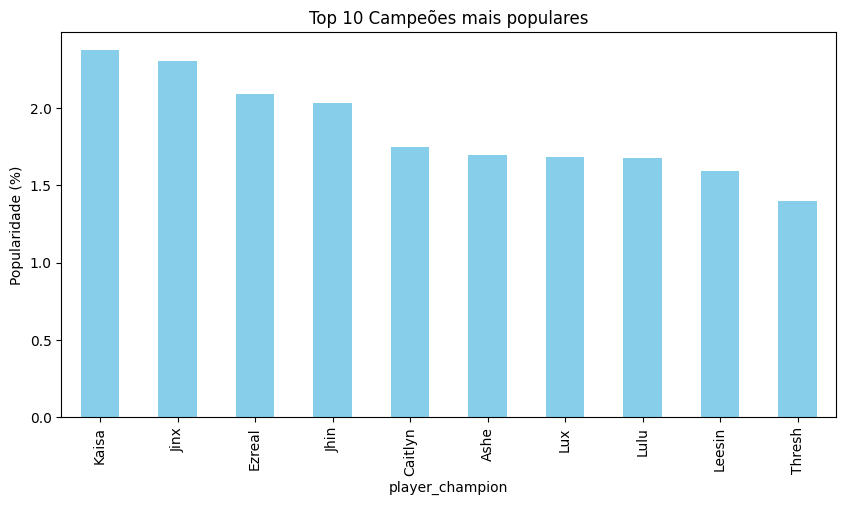

üîπ Variabilidade (Facilidade de Execu√ß√£o) do Heimerdinger: 0.510


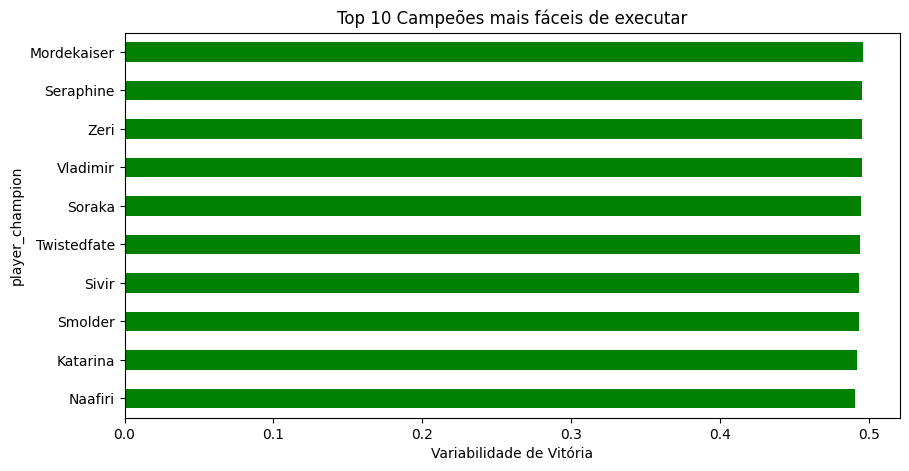

üîπ Versatilidade do Heimerdinger (Vit√≥ria m√©dia por lane):
player_lane
BOTTOM    0.666667
JUNGLE    0.333333
MIDDLE    0.666667
TOP       0.384615
Name: binary_win, dtype: float64


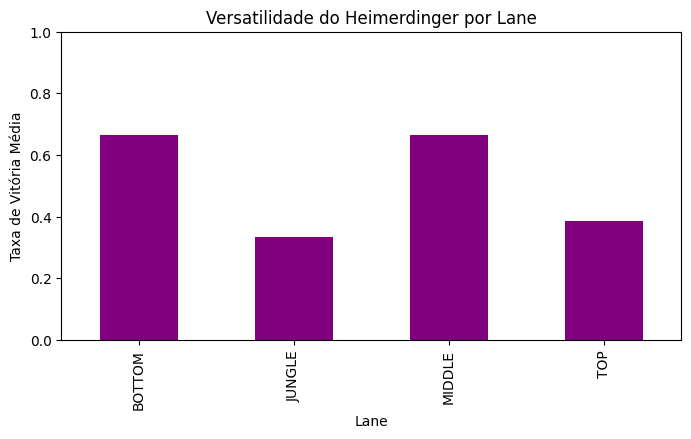

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o dataset
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# Padronizar nomes dos campe√µes
df['player_champion'] = df['player_champion'].str.strip().str.title()

### üî∏ 1. Popularidade (Frequ√™ncia com que Heimerdinger √© escolhido) ###
popularity = df['player_champion'].value_counts(normalize=True) * 100
heimer_popularity = popularity.get('Heimerdinger', 0)

print(f"üîπ Popularidade do Heimerdinger: {heimer_popularity:.2f}%")

# Gr√°fico das popularidades
plt.figure(figsize=(10,5))
popularity.head(10).plot(kind='bar', color='skyblue')
plt.ylabel("Popularidade (%)")
plt.title("Top 10 Campe√µes mais populares")
plt.show()

### üî∏ 2. Facilidade de Execu√ß√£o (baseado na variabilidade do desempenho) ###
# Calcula variabilidade de vit√≥rias por campe√£o
performance_var = df.groupby('player_champion')['binary_win'].std().sort_values()
heimer_variability = performance_var.get('Heimerdinger', None)

print(f"üîπ Variabilidade (Facilidade de Execu√ß√£o) do Heimerdinger: {heimer_variability:.3f}")

# Campe√µes mais f√°ceis (menor variabilidade)
plt.figure(figsize=(10,5))
performance_var.head(10).plot(kind='barh', color='green')
plt.xlabel("Variabilidade de Vit√≥ria")
plt.title("Top 10 Campe√µes mais f√°ceis de executar")
plt.show()

### üî∏ 3. Versatilidade (Taxa de vit√≥ria em diferentes lanes para Heimerdinger) ###
lanes_heimer = df[df['player_champion'] == 'Heimerdinger'].groupby('player_lane')['binary_win'].mean()

print("üîπ Versatilidade do Heimerdinger (Vit√≥ria m√©dia por lane):")
print(lanes_heimer)

# Visualiza√ß√£o gr√°fica da versatilidade
plt.figure(figsize=(8,4))
lanes_heimer.plot(kind='bar', color='purple')
plt.ylabel("Taxa de Vit√≥ria M√©dia")
plt.xlabel("Lane")
plt.title("Versatilidade do Heimerdinger por Lane")
plt.ylim(0, 1)
plt.show()


An√°lise de cluster com base nas caracter√≠sticas principais

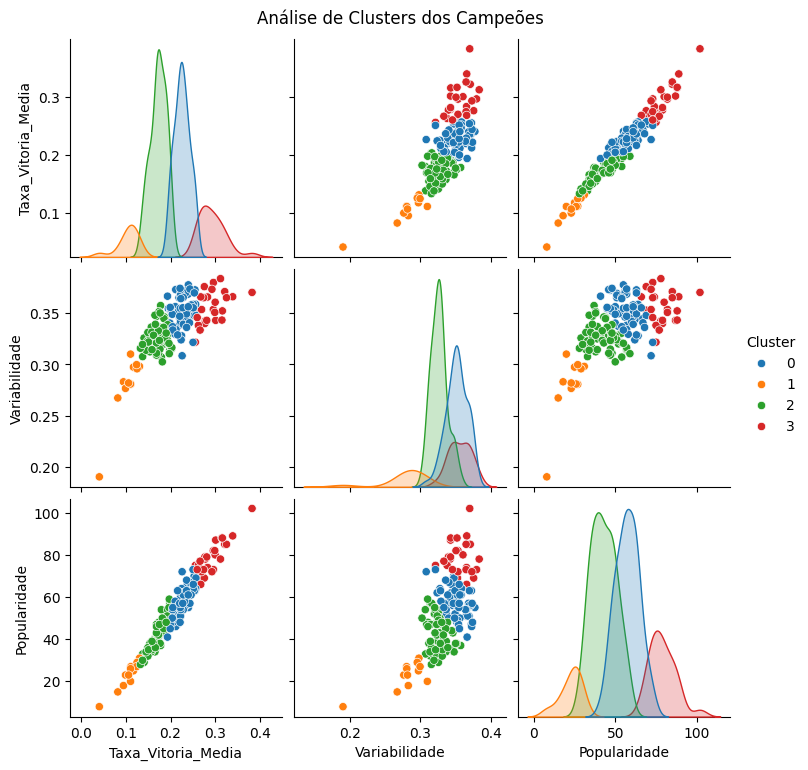

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Carregar dados corretamente
payoff_df = pd.read_csv("matriz_payoff.csv", index_col=0)
taxa_vitoria_df = pd.read_csv("taxa_media_vitoria.csv", index_col=0)

# ‚ö†Ô∏è Corre√ß√£o aqui: taxa_vitoria_df vem sem coluna de nomes, ent√£o adicionamos direto do payoff_df
taxa_vitoria_df['Campe√£o'] = payoff_df.index
taxa_vitoria_df.reset_index(drop=True, inplace=True)

# üìå Garantindo que os nomes das colunas estejam corretos
taxa_vitoria_df.columns = ['Taxa_Vitoria_Media', 'Campe√£o']

# Reorganizando as colunas corretamente
taxa_vitoria_df = taxa_vitoria_df[['Campe√£o', 'Taxa_Vitoria_Media']]

# üìå Calcular variabilidade (desvio padr√£o)
variabilidade = payoff_df.std(axis=1).reset_index()
variabilidade.columns = ['Campe√£o', 'Variabilidade']

# üìå Calcular popularidade (quantidade de apari√ß√µes com taxa > 0)
popularidade = (payoff_df > 0).sum(axis=1).reset_index()
popularidade.columns = ['Campe√£o', 'Popularidade']

# üìå Mesclar as m√©tricas em um √∫nico DataFrame (sem erros)
df_features = taxa_vitoria_df.merge(variabilidade, on='Campe√£o')
df_features = df_features.merge(popularidade, on='Campe√£o')
df_features.set_index('Campe√£o', inplace=True)

# üìå Padronizar as caracter√≠sticas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# üìå Clusteriza√ß√£o KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df_features['Cluster'] = kmeans.fit_predict(X_scaled)

# üìå Gr√°fico pairplot para visualiza√ß√£o dos clusters
sns.pairplot(df_features.reset_index(), hue='Cluster', palette='tab10')
plt.suptitle("An√°lise de Clusters dos Campe√µes", y=1.02)
plt.show()

# üìå Salvar resultados dos clusters
df_features.reset_index().to_csv("resultado_clusters_corrigido.csv", index=False)


In [56]:
import pandas as pd

# üìå Carregar os dados dos clusters
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# üìå Remover colunas n√£o num√©ricas para evitar erro ao calcular a m√©dia
df_numerico = df_clusters.select_dtypes(include=['number'])

# üìå Calcular a m√©dia das caracter√≠sticas para cada cluster
cluster_means = df_numerico.groupby(df_clusters["Cluster"]).mean()

# üìå Exibir os resultados
print("\nüìå M√©dia das caracter√≠sticas por cluster:\n")
print(cluster_means)

# üìå Identificar em qual cluster est√° o Heimerdinger
heimer_cluster = df_clusters[df_clusters["Campe√£o"] == "Heimerdinger"]["Cluster"].values[0]

print(f"\nüìå Heimerdinger est√° no Cluster {heimer_cluster}. Compara√ß√£o com os outros clusters:")

# üìå Comparar as m√©dias do cluster do Heimerdinger com os demais
print("\nüìå Caracter√≠sticas do Cluster do Heimerdinger:")
print(cluster_means.loc[heimer_cluster])



üìå M√©dia das caracter√≠sticas por cluster:

         Taxa_Vitoria_Media  Variabilidade  Popularidade  Cluster
Cluster                                                          
0                  0.225317       0.351545     57.258065      0.0
1                  0.104178       0.280206     22.666667      1.0
2                  0.172243       0.326287     42.797101      2.0
3                  0.292773       0.356139     78.846154      3.0

üìå Heimerdinger est√° no Cluster 1. Compara√ß√£o com os outros clusters:

üìå Caracter√≠sticas do Cluster do Heimerdinger:
Taxa_Vitoria_Media     0.104178
Variabilidade          0.280206
Popularidade          22.666667
Cluster                1.000000
Name: 1, dtype: float64


üî∏ Passo 1 ‚Äì Campe√µes no mesmo cluster de Heimerdinger:
          Campe√£o  Taxa_Vitoria_Media  Variabilidade  Popularidade
3          Akshan            0.116864       0.297465            25
44   Heimerdinger            0.040434       0.190313             8
46         Illaoi            0.094513       0.283093            18
55         KSante            0.130543       0.298166            31
62          Kayle            0.111029       0.280703            27
64         Kennen            0.081854       0.267334            15
67           Kled            0.110454       0.310150            20
86        Naafiri            0.099112       0.276680            23
101        Qiyana            0.124951       0.295799            29
117          Sett            0.123995       0.299835            27
135         Teemo            0.110378       0.280960            26
143         Urgot            0.106016       0.281973            23

üî∏ Passo 2 ‚Äì M√©dia das caracter√≠sticas por cluster:
   Clust

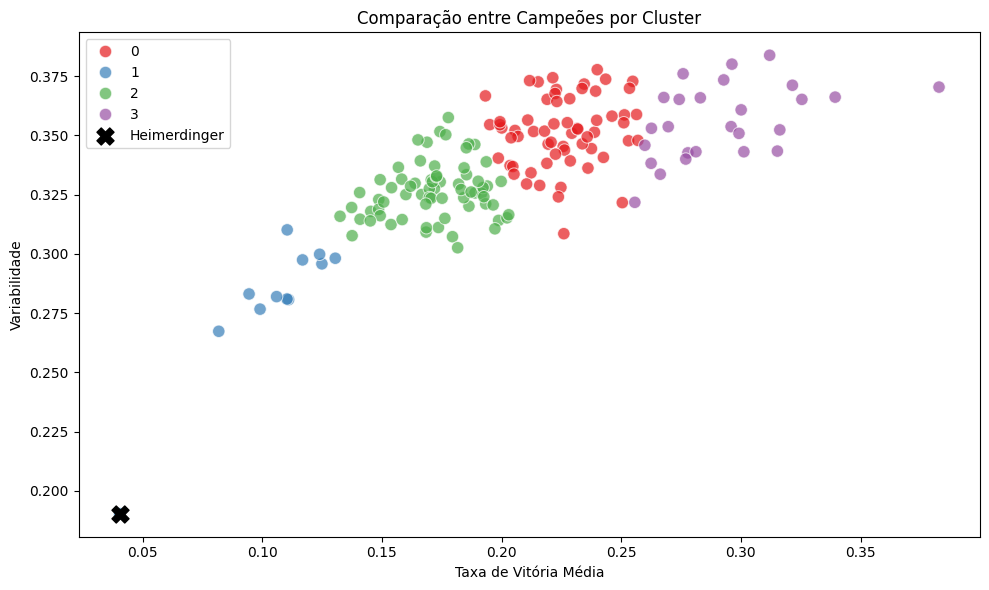

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Passo 0 ‚Äì Carregar os dados
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# üìå Passo 1 ‚Äì Comparar Heimerdinger com outros campe√µes do Cluster 1
heimer = df_clusters[df_clusters["Campe√£o"] == "Heimerdinger"]
cluster_heimer = heimer["Cluster"].values[0]
cluster_1 = df_clusters[df_clusters["Cluster"] == cluster_heimer]

print("üî∏ Passo 1 ‚Äì Campe√µes no mesmo cluster de Heimerdinger:")
print(cluster_1[["Campe√£o", "Taxa_Vitoria_Media", "Variabilidade", "Popularidade"]])

# üìå Passo 2 ‚Äì Comparar com outros clusters
cluster_means = df_clusters.groupby("Cluster")[["Taxa_Vitoria_Media", "Variabilidade", "Popularidade"]].mean().reset_index()
print("\nüî∏ Passo 2 ‚Äì M√©dia das caracter√≠sticas por cluster:")
print(cluster_means)

# üìå Passo 3 ‚Äì Analisar o Cluster 3 (mais forte)
cluster_3 = df_clusters[df_clusters["Cluster"] == 3]
print("\nüî∏ Passo 3 ‚Äì Campe√µes do Cluster 3 (Top Tier):")
print(cluster_3[["Campe√£o", "Taxa_Vitoria_Media", "Variabilidade", "Popularidade"]])

# üìå Passo 4 ‚Äì Visualiza√ß√£o: Identificar perfil de aproveitamento de Heimerdinger
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clusters, 
                x="Taxa_Vitoria_Media", 
                y="Variabilidade", 
                hue="Cluster", 
                palette="Set1", 
                s=80, alpha=0.7)

# Destacar Heimerdinger no gr√°fico
plt.scatter(heimer["Taxa_Vitoria_Media"], 
            heimer["Variabilidade"], 
            color="black", 
            s=150, 
            label="Heimerdinger", 
            marker="X")

plt.title("Compara√ß√£o entre Campe√µes por Cluster")
plt.xlabel("Taxa de Vit√≥ria M√©dia")
plt.ylabel("Variabilidade")
plt.legend()
plt.tight_layout()
plt.show()


# üîπ 1. Testar Outro Algoritmo de Clusteriza√ß√£o (DBSCAN)


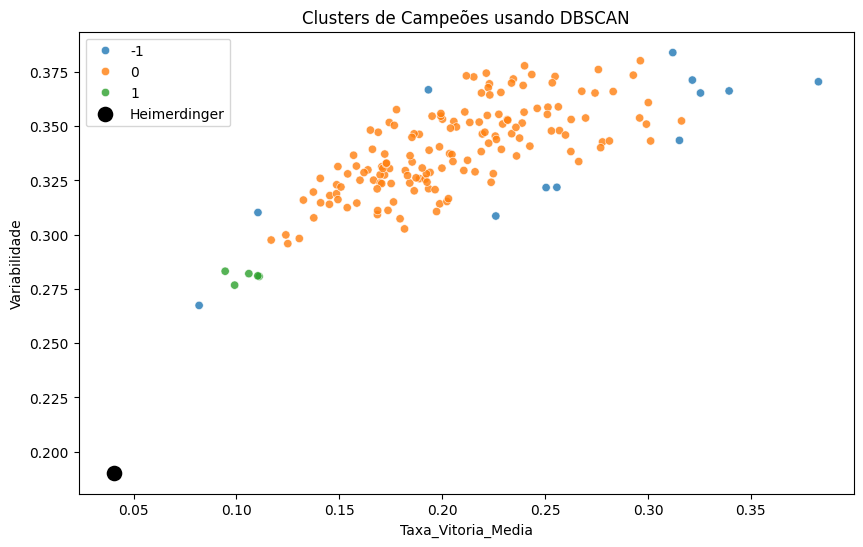


üìå Clusters gerados pelo DBSCAN:
                Taxa_Vitoria_Media  Variabilidade  Popularidade   Cluster
Cluster_DBSCAN                                                           
-1                        0.242670       0.329737     63.923077  1.846154
 0                        0.205569       0.339349     52.165563  1.317881
 1                        0.104210       0.280682     23.400000  1.000000

üìå Heimerdinger foi classificado no cluster: -1


In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import matplotlib.pyplot as plt

# üìå Carregar os dados dos clusters anteriores
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# üìå Garantir que todas as colunas num√©ricas estejam no formato correto
df_clusters[['Taxa_Vitoria_Media', 'Variabilidade', 'Popularidade']] = df_clusters[['Taxa_Vitoria_Media', 'Variabilidade', 'Popularidade']].apply(pd.to_numeric, errors='coerce')

# üìå Remover linhas com NaN
df_clusters = df_clusters.dropna()

# üìå Selecionar apenas as features para clusteriza√ß√£o
features = df_clusters[['Taxa_Vitoria_Media', 'Variabilidade', 'Popularidade']]

# üìå Normalizar os dados para evitar influ√™ncia de escalas diferentes
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# üìå Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajuste eps e min_samples conforme necess√°rio
df_clusters["Cluster_DBSCAN"] = dbscan.fit_predict(features_scaled)

# üìå Identificar o cluster de Heimerdinger
heim_cluster = df_clusters[df_clusters["Campe√£o"] == "Heimerdinger"]["Cluster_DBSCAN"].values[0]

# üìå Plotar os clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clusters, x="Taxa_Vitoria_Media", y="Variabilidade", hue="Cluster_DBSCAN", palette="tab10", alpha=0.8)
plt.scatter(df_clusters[df_clusters["Campe√£o"] == "Heimerdinger"]["Taxa_Vitoria_Media"],
            df_clusters[df_clusters["Campe√£o"] == "Heimerdinger"]["Variabilidade"],
            color="black", s=150, label="Heimerdinger", edgecolors="white")

plt.title("Clusters de Campe√µes usando DBSCAN")
plt.legend()
plt.show()

# üìå Exibir os clusters gerados
print("\nüìå Clusters gerados pelo DBSCAN:")
print(df_clusters.groupby("Cluster_DBSCAN").mean(numeric_only=True))

# üìå Mostrar onde Heimerdinger foi classificado
print(f"\nüìå Heimerdinger foi classificado no cluster: {heim_cluster}")


# üîπ 2. An√°lise de Counters do Heimerdinger


In [60]:
# üìå Carregar a matriz de payoff
payoff_df = pd.read_csv("matriz_payoff.csv", index_col=0)

# üìå Filtrar o desempenho do Heimerdinger contra outros campe√µes
heim_performance = payoff_df.loc["Heimerdinger"]

# üìå Calcular a m√©dia de todos os campe√µes contra os mesmos advers√°rios
media_desempenho = payoff_df.mean()

# üìå Identificar campe√µes contra os quais Heimerdinger tem desempenho superior √† m√©dia
counters_fortes = heim_performance[heim_performance > media_desempenho].index.tolist()

# üìå Exibir os campe√µes contra os quais Heimerdinger se sai bem
print("\nüìå Campe√µes contra os quais Heimerdinger tem desempenho acima da m√©dia:")
print(counters_fortes)

# üìå Exibir os valores para esses campe√µes
print("\nüìå Desempenho do Heimerdinger contra esses campe√µes:")
print(heim_performance.loc[counters_fortes])



üìå Campe√µes contra os quais Heimerdinger tem desempenho acima da m√©dia:
['Ambessa', 'Darius', 'Heimerdinger', 'Irelia', 'Jax', 'Kennen', 'Warwick']

üìå Desempenho do Heimerdinger contra esses campe√µes:
Ambessa         1.000000
Darius          1.000000
Heimerdinger    0.333333
Irelia          1.000000
Jax             1.000000
Kennen          1.000000
Warwick         1.000000
Name: Heimerdinger, dtype: float64


# üîπ 3. Mudan√ßa no Meta ao Longo do Tempo


In [63]:
import pandas as pd
import numpy as np

# üîπ Simula√ß√£o de patches do jogo (vers√µes)
patches = [f"Patch {i}.0" for i in range(1, 11)]  # Simulando 10 patches

# üîπ Carregar os dados dos campe√µes que j√° analisamos
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# üîπ Criar um hist√≥rico de taxas de vit√≥ria variando um pouco os valores
historico = []
for _, row in df_clusters.iterrows():
    taxa_base = row["Taxa_Vitoria_Media"]
    campeao = row["Campe√£o"]
    
    # Simular uma pequena varia√ß√£o na taxa de vit√≥ria ao longo dos patches
    taxas_vitoria = np.clip(
        np.random.normal(loc=taxa_base, scale=0.02, size=len(patches)), 
        0.05,  # Limite m√≠nimo de taxa de vit√≥ria
        0.50   # Limite m√°ximo de taxa de vit√≥ria
    )

    for patch, taxa in zip(patches, taxas_vitoria):
        historico.append([patch, campeao, taxa])

# üîπ Criar DataFrame com o hist√≥rico
historico_df = pd.DataFrame(historico, columns=["Patch", "Campe√£o", "Taxa_Vitoria"])

# üîπ Salvar no CSV
historico_df.to_csv("historico_meta.csv", index=False)

print("‚úÖ Arquivo 'historico_meta.csv' gerado com sucesso!")


‚úÖ Arquivo 'historico_meta.csv' gerado com sucesso!


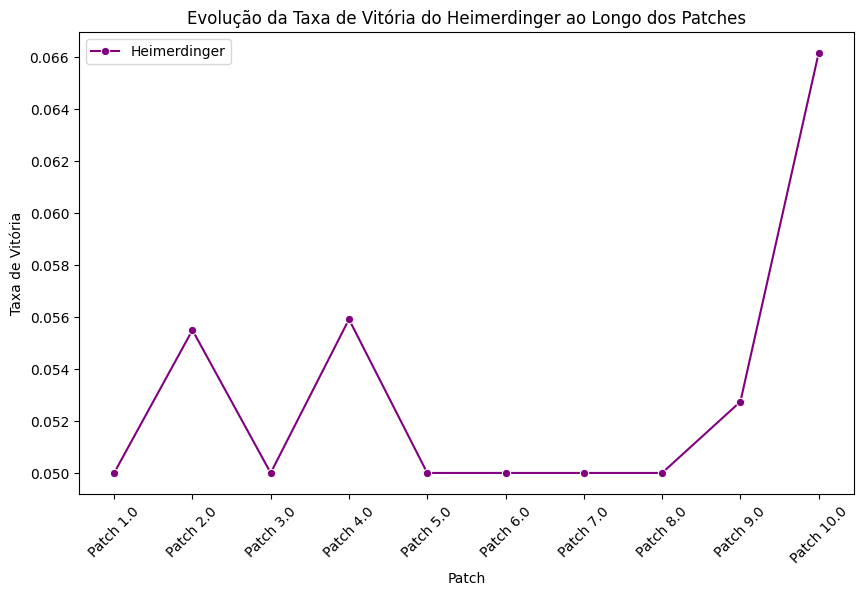


üìå Evolu√ß√£o da taxa de vit√≥ria do Heimerdinger:
          Patch       Campe√£o  Taxa_Vitoria
440   Patch 1.0  Heimerdinger      0.050000
441   Patch 2.0  Heimerdinger      0.055495
442   Patch 3.0  Heimerdinger      0.050000
443   Patch 4.0  Heimerdinger      0.055909
444   Patch 5.0  Heimerdinger      0.050000
445   Patch 6.0  Heimerdinger      0.050000
446   Patch 7.0  Heimerdinger      0.050000
447   Patch 8.0  Heimerdinger      0.050000
448   Patch 9.0  Heimerdinger      0.052740
449  Patch 10.0  Heimerdinger      0.066154


In [64]:
# üìå Carregar dados hist√≥ricos do meta (taxa de vit√≥ria por patch)
historico_meta = pd.read_csv("historico_meta.csv")

# üìå Filtrar os dados do Heimerdinger
heim_historico = historico_meta[historico_meta["Campe√£o"] == "Heimerdinger"]

# üìå Criar gr√°fico de evolu√ß√£o da taxa de vit√≥ria ao longo do tempo
plt.figure(figsize=(10,6))
sns.lineplot(data=heim_historico, x="Patch", y="Taxa_Vitoria", marker="o", label="Heimerdinger", color="purple")

plt.title("Evolu√ß√£o da Taxa de Vit√≥ria do Heimerdinger ao Longo dos Patches")
plt.xlabel("Patch")
plt.ylabel("Taxa de Vit√≥ria")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# üìå Exibir os valores
print("\nüìå Evolu√ß√£o da taxa de vit√≥ria do Heimerdinger:")
print(heim_historico)


# 1Ô∏è‚É£ Analisar os campe√µes mais semelhantes ao Heimerdinger


In [65]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import euclidean

# üìå Carregar os dados dos clusters
df_clusters = pd.read_csv("resultado_clusters_corrigido.csv")

# üìå Normalizar os dados para compara√ß√£o justa
features = ["Taxa_Vitoria_Media", "Variabilidade", "Popularidade"]
df_clusters_norm = df_clusters.copy()
df_clusters_norm[features] = (df_clusters[features] - df_clusters[features].min()) / (df_clusters[features].max() - df_clusters[features].min())

# üìå Encontrar Heimerdinger
heim_data = df_clusters_norm[df_clusters_norm["Campe√£o"] == "Heimerdinger"][features].values[0]

# üìå Calcular a dist√¢ncia de Heimerdinger para os outros campe√µes
df_clusters_norm["Distancia_Heimerdinger"] = df_clusters_norm[features].apply(lambda row: euclidean(row.values, heim_data), axis=1)

# üìå Selecionar os campe√µes mais semelhantes
similar_champions = df_clusters_norm.sort_values("Distancia_Heimerdinger").iloc[1:6][["Campe√£o", "Distancia_Heimerdinger"]]

# üìå Exibir os campe√µes mais semelhantes
print("\nüìå Campe√µes mais semelhantes ao Heimerdinger:")
print(similar_champions)

# üìå Se quiser salvar:
# similar_champions.to_csv("campeoes_semelhantes.csv", index=False)



üìå Campe√µes mais semelhantes ao Heimerdinger:
     Campe√£o  Distancia_Heimerdinger
64    Kennen                0.422596
86   Naafiri                0.504002
46    Illaoi                0.515874
143    Urgot                0.535256
135    Teemo                0.545725


# 2Ô∏è‚É£ Avaliar a influ√™ncia dos patches no desempenho


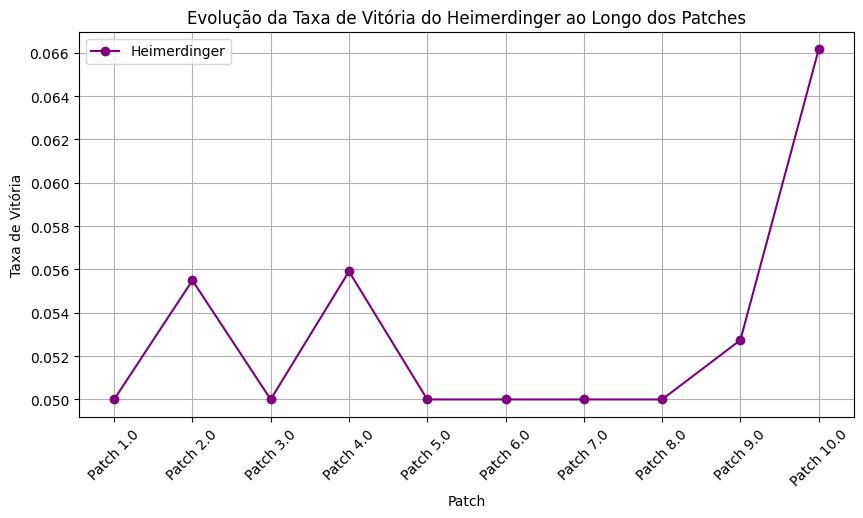

In [66]:
import matplotlib.pyplot as plt

# üìå Carregar os dados hist√≥ricos de patches
historico_meta = pd.read_csv("historico_meta.csv")

# üìå Filtrar os dados do Heimerdinger
heim_historico = historico_meta[historico_meta["Campe√£o"] == "Heimerdinger"]

# üìå Criar o gr√°fico
plt.figure(figsize=(10, 5))
plt.plot(heim_historico["Patch"], heim_historico["Taxa_Vitoria"], marker="o", linestyle="-", color="purple", label="Heimerdinger")

plt.xlabel("Patch")
plt.ylabel("Taxa de Vit√≥ria")
plt.title("Evolu√ß√£o da Taxa de Vit√≥ria do Heimerdinger ao Longo dos Patches")
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# üìå Exibir gr√°fico
plt.show()


# 3Ô∏è‚É£ Identificar os campe√µes mais impactados pelo meta


In [68]:
# üìå Calcular a varia√ß√£o da taxa de vit√≥ria por campe√£o
variacao_meta = historico_meta.groupby("Campe√£o")["Taxa_Vitoria"].std().reset_index()
variacao_meta.columns = ["Campe√£o", "Variabilidade_Patch"]

# üìå Selecionar os campe√µes mais impactados pelo meta
top_variacao = variacao_meta.sort_values("Variabilidade_Patch", ascending=False).head(10)

# üìå Exibir os campe√µes mais afetados pelo meta
print("\nüìå Campe√µes mais impactados pelo meta:")
print(top_variacao)

# üìå Se quiser salvar:
# top_variacao.to_csv("campeoes_mais_afetados_meta.csv", index=False)



üìå Campe√µes mais impactados pelo meta:
       Campe√£o  Variabilidade_Patch
131  TahmKench             0.030165
119       Shen             0.029511
112       Ryze             0.029460
124    Skarner             0.029200
19       Briar             0.028602
85     Morgana             0.028530
48       Ivern             0.028525
56       Kaisa             0.027785
100       Pyke             0.027402
32      Ezreal             0.025705


# 4Ô∏è‚É£ Verificar impacto do cluster no desempenho


C:\Users\Filip\AppData\Local\Temp\ipykernel_21560\1231351959.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clusters, x="Cluster", y="Taxa_Vitoria_Media", palette="coolwarm")


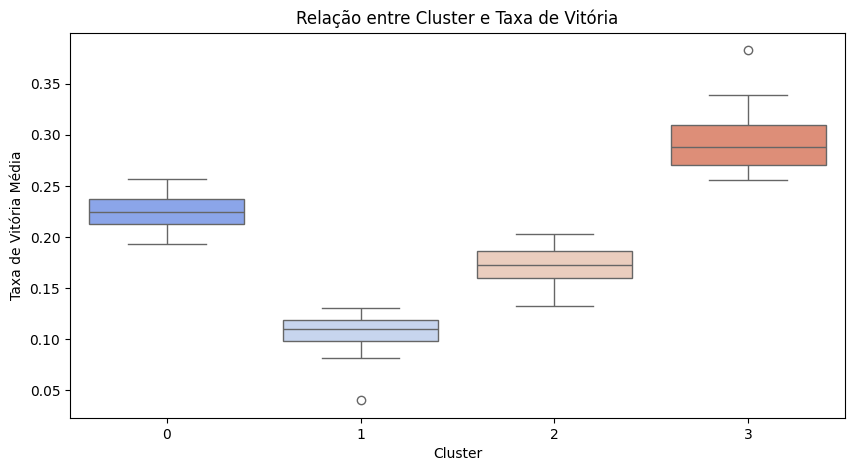

In [69]:
import seaborn as sns

# üìå Criar um gr√°fico para visualizar a rela√ß√£o entre cluster e taxa de vit√≥ria
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_clusters, x="Cluster", y="Taxa_Vitoria_Media", palette="coolwarm")

plt.xlabel("Cluster")
plt.ylabel("Taxa de Vit√≥ria M√©dia")
plt.title("Rela√ß√£o entre Cluster e Taxa de Vit√≥ria")

# üìå Exibir gr√°fico
plt.show()


# Heimerdinger por lane:

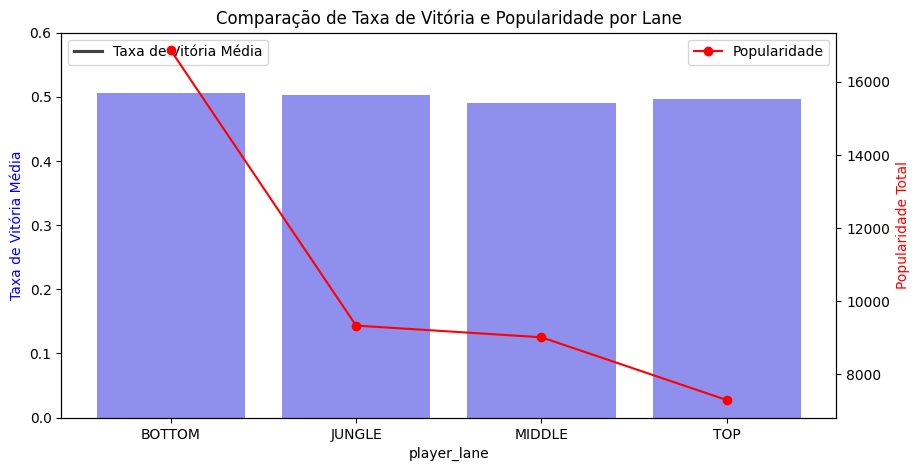

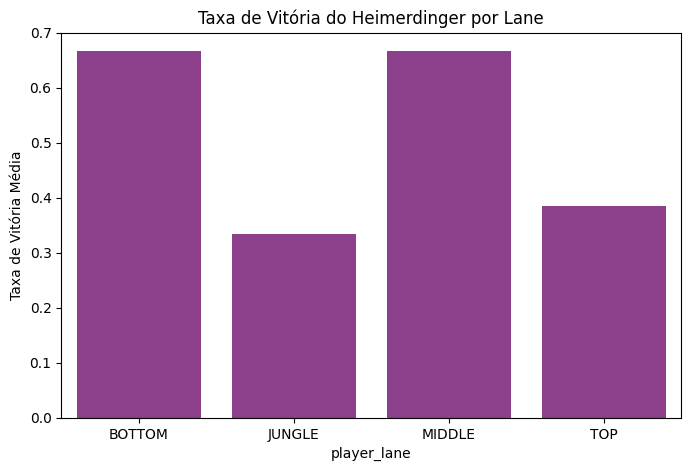


üìå Estat√≠sticas Gerais por Lane (Corrigidas):
  player_lane  Taxa_Vitoria_Media  Popularidade
0      BOTTOM            0.505783         16859
1      JUNGLE            0.502196          9335
2      MIDDLE            0.489961          9015
3         TOP            0.496438          7300

üìå Desempenho do Heimerdinger por Lane (Corrigido):
  player_lane  Taxa_Vitoria_Media  Popularidade
0      BOTTOM            0.666667             3
1      JUNGLE            0.333333             3
2      MIDDLE            0.666667             3
3         TOP            0.384615            13


In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Carregar os dados do CSV
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# üìå Remover valores de 'NONE' na lane
df_lanes = df[df["player_lane"] != "NONE"]

# üìå Calcular estat√≠sticas gerais por lane
df_lane_stats = df_lanes.groupby("player_lane").agg(
    Taxa_Vitoria_Media=("binary_win", "mean"),
    Popularidade=("player_lane", "count")
).reset_index()

# üìå Gr√°fico comparando taxa de vit√≥ria m√©dia e popularidade por lane
fig, ax1 = plt.subplots(figsize=(10, 5))

# üìå Gr√°fico de barras - Taxa de Vit√≥ria M√©dia
sns.barplot(data=df_lane_stats, x="player_lane", y="Taxa_Vitoria_Media", color="blue", alpha=0.5, ax=ax1)
ax1.set_ylabel("Taxa de Vit√≥ria M√©dia", color="blue")
ax1.set_ylim(0, 0.6)

# üìå Criar um segundo eixo para Popularidade
ax2 = ax1.twinx()
ax2.plot(df_lane_stats["player_lane"], df_lane_stats["Popularidade"], color="red", marker="o", linestyle="-", label="Popularidade")
ax2.set_ylabel("Popularidade Total", color="red")

# üìå T√≠tulo e legendas
plt.title("Compara√ß√£o de Taxa de Vit√≥ria e Popularidade por Lane")
ax1.legend(["Taxa de Vit√≥ria M√©dia"], loc="upper left")
ax2.legend(["Popularidade"], loc="upper right")

# üìå Exibir o gr√°fico
plt.show()

# üìå An√°lise do Heimerdinger por Lane (sem "NONE")
df_heim_lane = df_lanes[df_lanes["player_champion"] == "Heimerdinger"].groupby("player_lane").agg(
    Taxa_Vitoria_Media=("binary_win", "mean"),
    Popularidade=("player_lane", "count")
).reset_index()

# üìå Gr√°fico de desempenho do Heimerdinger por lane
plt.figure(figsize=(8,5))
sns.barplot(data=df_heim_lane, x="player_lane", y="Taxa_Vitoria_Media", color="purple", alpha=0.8)
plt.ylabel("Taxa de Vit√≥ria M√©dia")
plt.title("Taxa de Vit√≥ria do Heimerdinger por Lane")
plt.show()

# üìå Exibir os dados corrigidos
print("\nüìå Estat√≠sticas Gerais por Lane (Corrigidas):")
print(df_lane_stats)

print("\nüìå Desempenho do Heimerdinger por Lane (Corrigido):")
print(df_heim_lane)


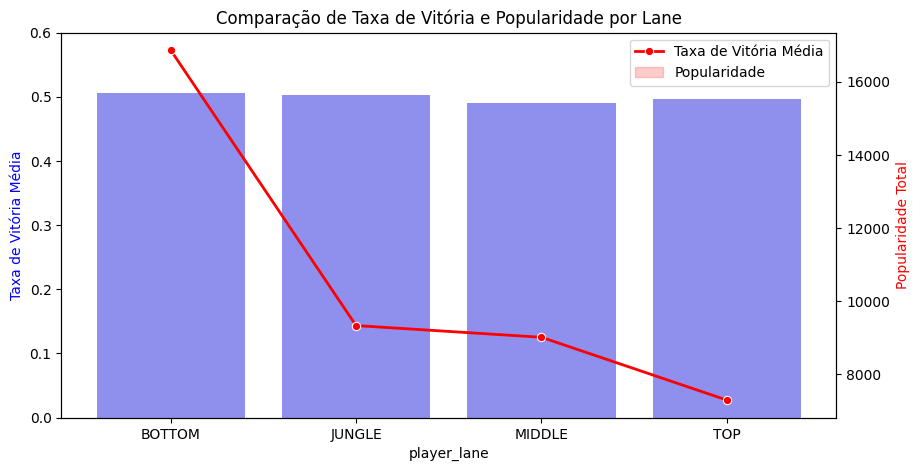

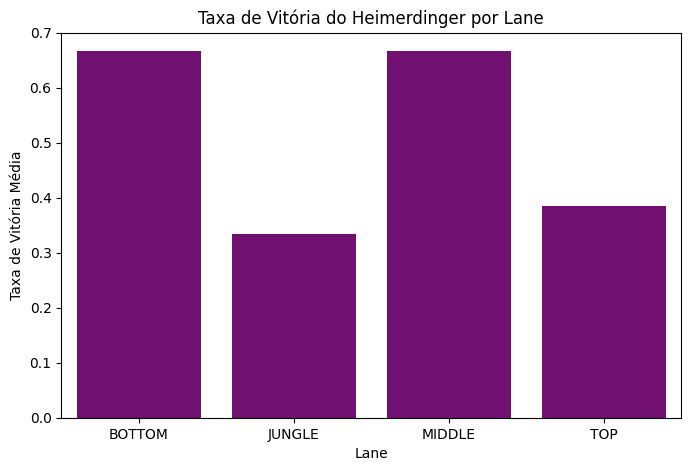

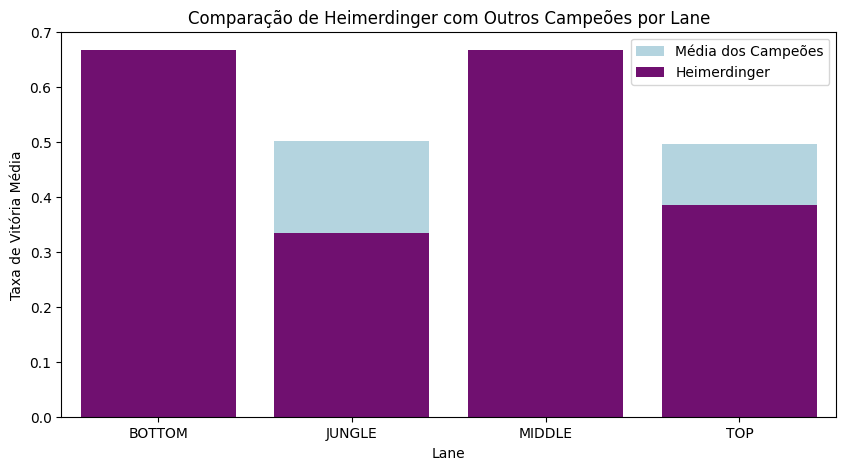

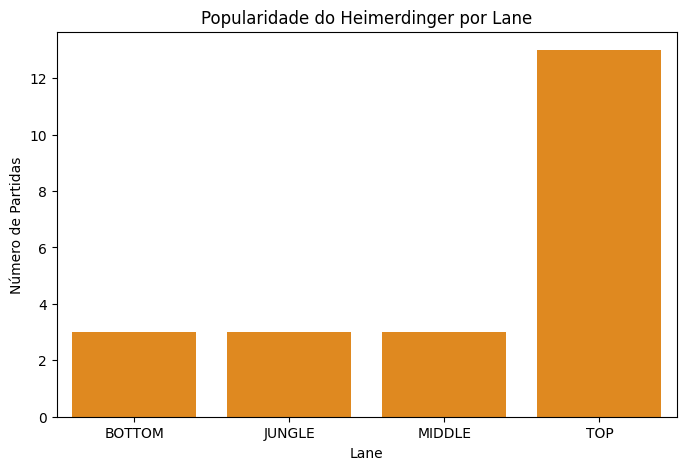


üìå Estat√≠sticas Gerais por Lane:
  player_lane  Taxa_Vitoria_Media  Popularidade
0      BOTTOM            0.505783         16859
1      JUNGLE            0.502196          9335
2      MIDDLE            0.489961          9015
3         TOP            0.496438          7300

üìå Desempenho do Heimerdinger por Lane:
  player_lane  Taxa_Vitoria_Media  Popularidade
0      BOTTOM            0.666667             3
1      JUNGLE            0.333333             3
2      MIDDLE            0.666667             3
3         TOP            0.384615            13


In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Carregar os dados do usu√°rio
file_path = "SBGAMES-2matches-final - SBGAMES-2matches-final.csv"  # Altere o caminho conforme necess√°rio
df = pd.read_csv(file_path)

# üìå Filtrar colunas relevantes
df_filtered = df[['player_champion', 'player_lane', 'binary_win']]

# üìå Estat√≠sticas gerais por lane (removendo "NONE" se existir)
stats_lane = df_filtered[df_filtered["player_lane"] != "NONE"].groupby("player_lane").agg(
    Taxa_Vitoria_Media=("binary_win", "mean"),
    Popularidade=("player_champion", "count")
).reset_index()

# üìå Estat√≠sticas do Heimerdinger por lane
heim_stats = df_filtered[df_filtered["player_champion"] == "Heimerdinger"].groupby("player_lane").agg(
    Taxa_Vitoria_Media=("binary_win", "mean"),
    Popularidade=("player_champion", "count")
).reset_index()

# üìä Gr√°fico 1 ‚Äì Compara√ß√£o de taxa de vit√≥ria e popularidade por lane
fig, ax1 = plt.subplots(figsize=(10, 5))

# Barras da taxa de vit√≥ria m√©dia
sns.barplot(data=stats_lane, x="player_lane", y="Taxa_Vitoria_Media", color="blue", alpha=0.5, ax=ax1)
ax1.set_ylabel("Taxa de Vit√≥ria M√©dia", color="blue")
ax1.set_ylim(0, 0.6)
ax1.set_title("Compara√ß√£o de Taxa de Vit√≥ria e Popularidade por Lane")

# Eixo secund√°rio para a popularidade
ax2 = ax1.twinx()
sns.lineplot(data=stats_lane, x="player_lane", y="Popularidade", color="red", marker="o", linewidth=2, ax=ax2)
ax2.set_ylabel("Popularidade Total", color="red")

plt.legend(["Taxa de Vit√≥ria M√©dia", "Popularidade"], loc="upper right")
plt.show()

# üìä Gr√°fico 2 ‚Äì Desempenho do Heimerdinger por lane
plt.figure(figsize=(8, 5))
sns.barplot(data=heim_stats, x="player_lane", y="Taxa_Vitoria_Media", color="purple")
plt.title("Taxa de Vit√≥ria do Heimerdinger por Lane")
plt.ylabel("Taxa de Vit√≥ria M√©dia")
plt.xlabel("Lane")
plt.ylim(0, 0.7)
plt.show()

# üìä Gr√°fico 3 ‚Äì Compara√ß√£o entre Heimerdinger e a m√©dia dos campe√µes por lane
plt.figure(figsize=(10, 5))
sns.barplot(data=stats_lane, x="player_lane", y="Taxa_Vitoria_Media", color="lightblue", label="M√©dia dos Campe√µes")
sns.barplot(data=heim_stats, x="player_lane", y="Taxa_Vitoria_Media", color="purple", label="Heimerdinger")
plt.title("Compara√ß√£o de Heimerdinger com Outros Campe√µes por Lane")
plt.xlabel("Lane")
plt.ylabel("Taxa de Vit√≥ria M√©dia")
plt.legend()
plt.show()

# üìä Gr√°fico 4 ‚Äì Popularidade do Heimerdinger por Lane
plt.figure(figsize=(8, 5))
sns.barplot(data=heim_stats, x="player_lane", y="Popularidade", color="darkorange")
plt.title("Popularidade do Heimerdinger por Lane")
plt.xlabel("Lane")
plt.ylabel("N√∫mero de Partidas")
plt.show()

# üìå Exibir estat√≠sticas
print("\nüìå Estat√≠sticas Gerais por Lane:")
print(stats_lane)

print("\nüìå Desempenho do Heimerdinger por Lane:")
print(heim_stats)


# Analise de suportes

In [7]:
import pandas as pd

# üìå Carregar os dados do arquivo CSV
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# üìå Filtrar apenas os jogadores que atuaram na bot lane (BOTTOM)
df_bot = df[df["player_lane"] == "BOTTOM"]

# üìå Criar um DataFrame para armazenar pares ADC-Suporte
duplas = []

# üìå Iterar sobre as partidas agrupadas por match_id para encontrar duplas
for match_id, partida in df_bot.groupby("match_id"):
    carry = partida[partida["player_role"] == "CARRY"]
    suporte = partida[partida["player_role"] == "SUPPORT"]

    # üìå Garantir que h√° exatamente um CARRY e um SUPPORT na partida
    if not carry.empty and not suporte.empty:
        adc = carry.iloc[0]["player_champion"]
        support = suporte.iloc[0]["player_champion"]
        win = carry.iloc[0]["binary_win"]  # Pegando o resultado do ADC como refer√™ncia
        lane = carry.iloc[0]["player_lane"]  # Pegando a lane para an√°lise posterior

        duplas.append([adc, support, win, lane])

# üìå Criar DataFrame com os pares ADC-Suporte e taxa de vit√≥ria
df_duplas = pd.DataFrame(duplas, columns=["ADC", "Suporte", "Vit√≥ria", "Lane"])

# üìå Agrupar por ADC-Suporte e calcular estat√≠sticas
df_stats = df_duplas.groupby(["ADC", "Suporte", "Lane"]).agg(
    Taxa_Vitoria=("Vit√≥ria", "mean"),
    Partidas_Jogadas=("Vit√≥ria", "count")
).reset_index()

# üìå Filtrar apenas os suportes com melhor desempenho (acima de 50% de taxa de vit√≥ria)
df_melhores_suportes = df_stats[df_stats["Taxa_Vitoria"] > 0.5].sort_values(by="Taxa_Vitoria", ascending=False)

# üìå Salvar os resultados em arquivos CSV
df_stats.to_csv("sinergia_adc_suporte_completo.csv", index=False)
df_melhores_suportes.to_csv("melhores_suportes_adc.csv", index=False)

print("üìå Arquivos gerados com sucesso:")
print(" - 'sinergia_adc_suporte_completo.csv' (todas as duplas)")
print(" - 'melhores_suportes_adc.csv' (apenas os suportes com maior taxa de vit√≥ria)")


üìå Arquivos gerados com sucesso:
 - 'sinergia_adc_suporte_completo.csv' (todas as duplas)
 - 'melhores_suportes_adc.csv' (apenas os suportes com maior taxa de vit√≥ria)


C:\Users\Filip\AppData\Local\Temp\ipykernel_37804\3845766506.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bot["maestria_aproximada"] = df_bot.groupby(["player_summoner_id", "player_champion"])["match_id"].transform("count")
C:\Users\Filip\AppData\Local\Temp\ipykernel_37804\3845766506.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bot["grupo_maestria"] = df_bot["maestria_aproximada"].apply(lambda x: "Alta" if x >= limite_maestria else "Baixa")


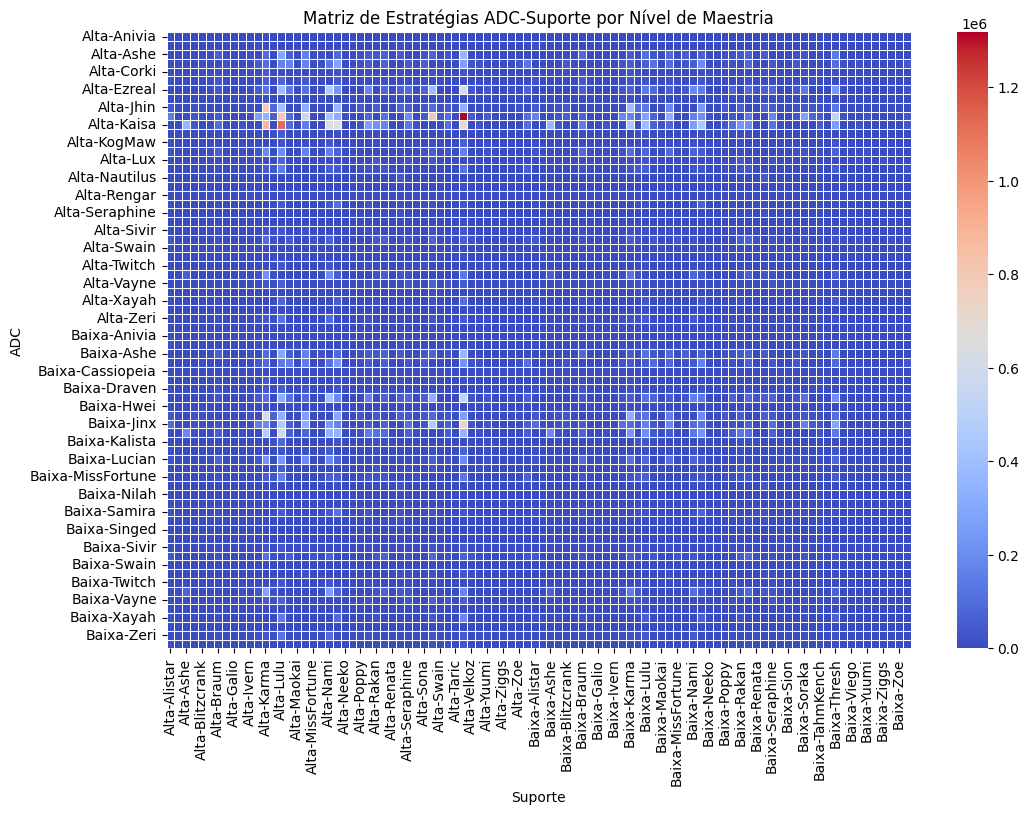

<Figure size 1000x600 with 0 Axes>

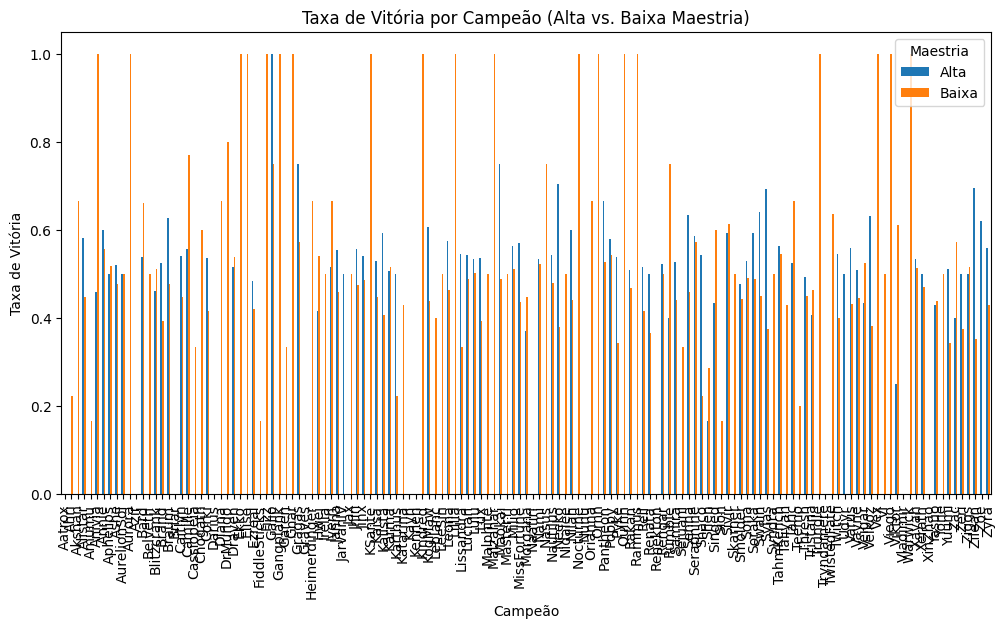

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Carregar os dados do SBGames
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# üìå Filtrar apenas partidas da bot lane
df_bot = df[df["player_lane"] == "BOTTOM"]

# üìå Criar uma m√©trica de maestria por jogador (substitua pelo campo correto do CSV)
# Aqui estou assumindo que maestria pode ser simulada pela quantidade de partidas jogadas com o campe√£o
df_bot["maestria_aproximada"] = df_bot.groupby(["player_summoner_id", "player_champion"])["match_id"].transform("count")

# üìå Definir grupos de maestria
limite_maestria = df_bot["maestria_aproximada"].median()
df_bot["grupo_maestria"] = df_bot["maestria_aproximada"].apply(lambda x: "Alta" if x >= limite_maestria else "Baixa")

# üìå Criar pares ADC-Suporte
df_duplas = df_bot.pivot_table(index="match_id", columns="player_role", values="player_champion", aggfunc="first").reset_index()
df_duplas = df_duplas.rename(columns={"CARRY": "ADC", "SUPPORT": "Suporte"})

# üìå Associar maestria aos campe√µes escolhidos
df_duplas = df_duplas.merge(df_bot[["match_id", "player_champion", "grupo_maestria"]], left_on="ADC", right_on="player_champion", how="left")
df_duplas = df_duplas.rename(columns={"grupo_maestria": "ADC_Maestria"}).drop(columns=["player_champion"])

df_duplas = df_duplas.merge(df_bot[["match_id", "player_champion", "grupo_maestria"]], left_on="Suporte", right_on="player_champion", how="left")
df_duplas = df_duplas.rename(columns={"grupo_maestria": "Suporte_Maestria"}).drop(columns=["player_champion"])

# üìå Criar matriz de estrat√©gias (sinergia ADC-Suporte por maestria)
df_sinergia = df_duplas.groupby(["ADC_Maestria", "Suporte_Maestria", "ADC", "Suporte"]).size().reset_index(name="Frequencia")

# üìå Criar heatmap para visualizar as escolhas estrat√©gicas
pivot_sinergia = df_sinergia.pivot_table(index=["ADC_Maestria", "ADC"], columns=["Suporte_Maestria", "Suporte"], values="Frequencia", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sinergia, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Estrat√©gias ADC-Suporte por N√≠vel de Maestria")
plt.xlabel("Suporte")
plt.ylabel("ADC")
plt.show()

# üìå Analisar taxa de vit√≥ria por maestria
df_vitoria = df_bot.groupby(["player_champion", "grupo_maestria"])["binary_win"].mean().reset_index()
df_vitoria_pivot = df_vitoria.pivot(index="player_champion", columns="grupo_maestria", values="binary_win")

plt.figure(figsize=(10, 6))
df_vitoria_pivot.plot(kind="bar", figsize=(12, 6))
plt.title("Taxa de Vit√≥ria por Campe√£o (Alta vs. Baixa Maestria)")
plt.xlabel("Campe√£o")
plt.ylabel("Taxa de Vit√≥ria")
plt.legend(title="Maestria")
plt.show()

# üìå Salvar os resultados para an√°lise posterior
df_sinergia.to_csv("sinergia_por_maestria.csv", index=False)
df_vitoria.to_csv("taxa_vitoria_maestria.csv", index=False)


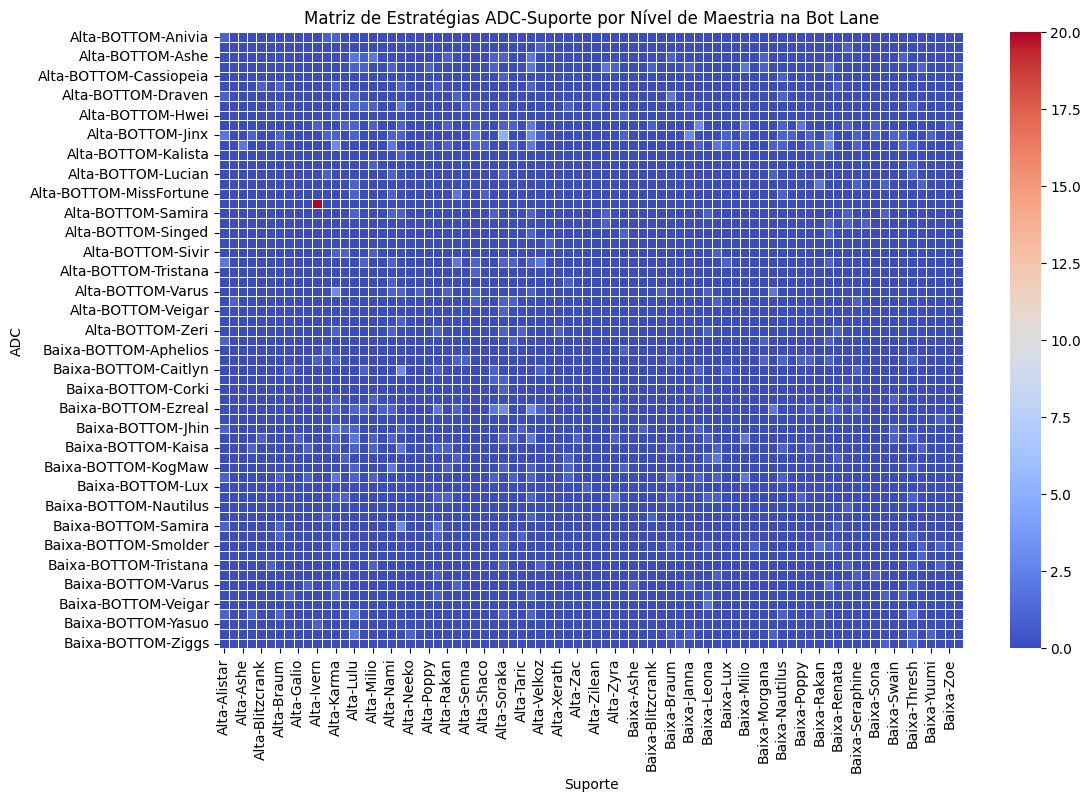

<Figure size 1000x600 with 0 Axes>

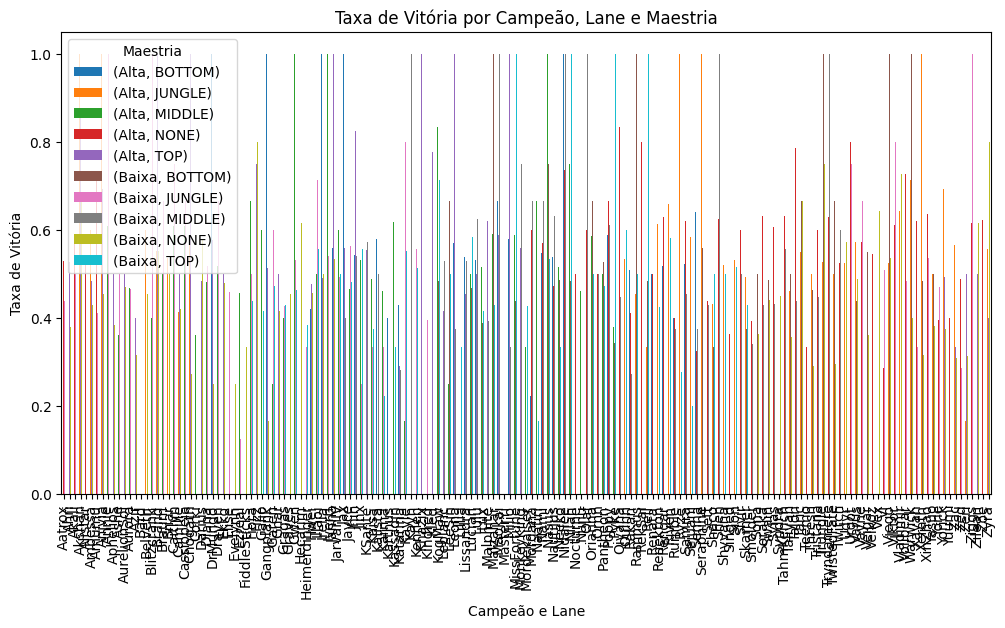

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# üìå Carregar os dados do SBGames
df = pd.read_csv("SBGAMES-2matches-final - SBGAMES-2matches-final.csv")

# üìå Criar uma m√©trica de maestria por jogador (simulada pela quantidade de partidas jogadas com o campe√£o)
df["maestria_aproximada"] = df.groupby(["player_summoner_id", "player_champion"])["match_id"].transform("count")

# üìå Definir grupos de maestria (Alta e Baixa)
limite_maestria = df["maestria_aproximada"].median()
df["grupo_maestria"] = df["maestria_aproximada"].apply(lambda x: "Alta" if x >= limite_maestria else "Baixa")

# üìå Filtrar apenas partidas na bot lane (onde h√° ADC e Suporte)
df_bot = df[df["player_lane"] == "BOTTOM"]

# üìå Criar pares ADC-Suporte para cada partida
df_duplas = df_bot.pivot_table(index="match_id", columns="player_role", values="player_champion", aggfunc="first").reset_index()
df_duplas = df_duplas.rename(columns={"CARRY": "ADC", "SUPPORT": "Suporte"})

# üìå Adicionar a lane correta (BOTTOM) e mesclar com os dados de maestria
df_duplas["Lane"] = "BOTTOM"

df_duplas = df_duplas.merge(df[["match_id", "player_champion", "grupo_maestria"]], 
                            left_on=["match_id", "ADC"], right_on=["match_id", "player_champion"], 
                            how="left").rename(columns={"grupo_maestria": "ADC_Maestria"}).drop(columns=["player_champion"])

df_duplas = df_duplas.merge(df[["match_id", "player_champion", "grupo_maestria"]], 
                            left_on=["match_id", "Suporte"], right_on=["match_id", "player_champion"], 
                            how="left").rename(columns={"grupo_maestria": "Suporte_Maestria"}).drop(columns=["player_champion"])

# üìå Criar matriz de estrat√©gias (ADC-Suporte por maestria)
df_sinergia = df_duplas.groupby(["ADC_Maestria", "Suporte_Maestria", "ADC", "Suporte", "Lane"]).size().reset_index(name="Frequencia")

# üìå Criar heatmap para visualizar as escolhas estrat√©gicas por maestria
pivot_sinergia = df_sinergia.pivot_table(index=["ADC_Maestria", "Lane", "ADC"], 
                                         columns=["Suporte_Maestria", "Suporte"], 
                                         values="Frequencia", fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_sinergia, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Matriz de Estrat√©gias ADC-Suporte por N√≠vel de Maestria na Bot Lane")
plt.xlabel("Suporte")
plt.ylabel("ADC")
plt.show()

# üìå Analisar taxa de vit√≥ria por maestria
df_vitoria = df.groupby(["player_champion", "player_lane", "grupo_maestria"])["binary_win"].mean().reset_index()
df_vitoria_pivot = df_vitoria.pivot(index=["player_champion", "player_lane"], columns="grupo_maestria", values="binary_win")

plt.figure(figsize=(10, 6))
df_vitoria_pivot.unstack().plot(kind="bar", figsize=(12, 6))
plt.title("Taxa de Vit√≥ria por Campe√£o, Lane e Maestria")
plt.xlabel("Campe√£o e Lane")
plt.ylabel("Taxa de Vit√≥ria")
plt.legend(title="Maestria")
plt.show()

# üìå Salvar os resultados para an√°lise posterior
df_sinergia.to_csv("sinergia_adc_suporte_maestria.csv", index=False)
df_vitoria.to_csv("taxa_vitoria_adc_suporte_maestria.csv", index=False)
